<a href="https://colab.research.google.com/github/olini/alura-ds-series-temporais/blob/main/modulo-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Instalação de pacotes

In [1]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 7.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


# 1. Imports

In [2]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Carregamento dos dados

In [3]:
alucar = pd.read_csv('alucar.csv')

In [4]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


## 2.1. Informações dos dados

In [7]:
print('Número de linhas: ', alucar.shape[0])
print('Número de colunas: ', alucar.shape[1])

Número de linhas:  24
Número de colunas:  2


In [9]:
print('Quantidade de valores NA: ', alucar.isna().sum().sum())

Quantidade de valores NA:  0


In [10]:
print('Tipos das colunas: ')
alucar.dtypes

Tipos das colunas: 


mes       object
vendas     int64
dtype: object

# 3. Transformação dos dados

## 3.1. Coluna *mes* para datetime

In [12]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

# 4. Visualização dos dados

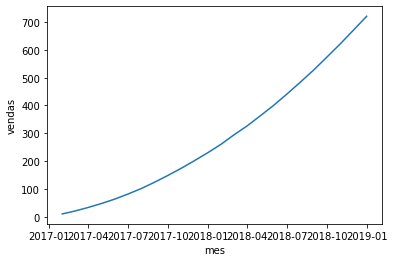

In [14]:
sns.lineplot(x='mes', y='vendas', data=alucar);